Agora que você aprendeu como usar dados do mercado imobiliário para prever o preço das casas na Califórnia, vamos colocar esse conhecimento em prática com uma oficina.

O objetivo desta oficina é consolidar os conceitos que você aprendeu na aula prática, permitindo que explore o conjunto de dados do mercado imobiliário por conta própria e realize algumas análises adicionais. Você terá a oportunidade de trabalhar com diferentes técnicas de ciência de dados e fazer suas próprias previsões.

Nesta oficina, você vai trabalhar em um conjunto de dados semelhante ao que usamos na aula. A tarefa é aprofundar a análise e a modelagem dos dados de imóveis para responder a algumas questões e realizar previsões.

Você poderá usar qualquer ferramenta com a qual se sinta confortável, como Jupyter Notebook, Google Colab ou qualquer outro ambiente Python.

Questão 1: Análise exploratória de dados (EDA)

  - Tarefa: crie um gráfico de dispersão (scatter plot) para explorar a relação entre median_income (renda mediana) e median_house_value (valor mediano da casa).

  - Reflita: o que você observa sobre a relação entre a renda mediana e o valor das casas? Existe uma correlação clara entre essas duas variáveis?

Questão 2: Divisão dos dados

  - Tarefa: divida o conjunto de dados em dois subconjuntos: um para treinamento e outro para teste (70% para treinamento e 30% para teste).

  - Reflita: por que é importante dividir os dados em conjuntos de treinamento e teste antes de treinar um modelo? O que você espera ao testar o modelo no conjunto de teste fazendo essa modificação no código?

Questão 3: Análise de outliers

  - Tarefa: utilize gráficos, como boxplots, para identificar possíveis outliers nas variáveis median_income e median_house_value.

  - Reflita: existem valores atípicos (outliers) nessas variáveis? O que você poderia fazer para lidar com esses outliers? É necessário removê-los ou transformá-los para melhorar a precisão do modelo?

Questão 4: Seleção de variáveis (feature Selection)

  - Tarefa: treine o modelo de regressão linear utilizando apenas as seguintes variáveis: median_income, housing_median_age, e rooms_per_household. Compare o desempenho do modelo treinado com essas variáveis com o modelo anterior que usava todas as variáveis disponíveis.

  - Reflita:  o que aconteceu com o desempenho do modelo ao usar apenas uma seleção de variáveis? Foi melhor ou pior do que o modelo que usava todas as variáveis?

Questão 5: Implementação de uma árvore de decisão para regressão

  - Tarefa: implemente uma Árvore de Decisão para prever o valor mediano das casas (median_house_value). Compare o desempenho da Árvore de Decisão com o desempenho do modelo de Regressão Linear usando a métrica Erro Médio Absoluto (MAE).

  - Reflita:  qual dos modelos teve um desempenho melhor em termos de MAE? Por que a Árvore de Decisão pode ter apresentado melhor (ou pior) desempenho em comparação com a Regressão Linear? Considere como as Árvores de Decisão capturam relações não lineares nos dados.

As questões inseridas em cada passo são para que você faça uma reflexão sobre cada ação. Você não precisa enviar as respostas nesta oficina.



Boa prática!

### Importações e Carregamento dos Dados

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Carregar o dataset
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['median_house_value'] = california.target

# Visualizar as primeiras linhas
print(data.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  median_house_value  
0    -122.23               4.526  
1    -122.22               3.585  
2    -122.24               3.521  
3    -122.25               3.413  
4    -122.25               3.422  


O dataset representa informações sobre regiões geográficas da Califórnia. Cada linha corresponde a um "block group", que é uma pequena área geográfica (algo como um bairro).

- MedInc (Renda Mediana): Média da renda anual das famílias na região.
Exemplo: 8.3252 = US$ 83.252 por ano (valor em dezenas de milhares de dólares).

- HouseAge (Idade Mediana das Casas): Idade média das casas na região (em anos).
Exemplo: 41.0 = 41 anos.

- AveRooms (Média de Cômodos por Residência): Número médio de cômodos (quartos, sala, cozinha, etc.) por casa na região.
Exemplo: 6.984127 ≈ 7 cômodos por casa.

- AveBedrms (Média de Quartos por Residência): Número médio de quartos por casa.
Exemplo: 1.023810 ≈ 1 quarto por casa.

- Population (População): Número total de habitantes na região.
Exemplo: 322.0 = 322 pessoas.

- AveOccup (Média de Ocupantes por Casa): Número médio de moradores por casa.
Exemplo: 2.555556 ≈ 2.5 pessoas por casa.

- Latitude (Latitude): Coordenada geográfica norte-sul da região.
Exemplo: 37.88 = próximo a São Francisco.

- Longitude (Longitude): Coordenada geográfica leste-oeste da região.
Exemplo: -122.23 = região costeira da Califórnia.

- median_house_value (Valor Mediano das Casas): Valor mediano das casas na região (em centenas de milhares de dólares).
Exemplo: 4.526 = US$ 452.600.

### Questão 1: Análise Exploratória de Dados (EDA)

Criação de um gráfico para explorar a relação entre renda e valor das casas:

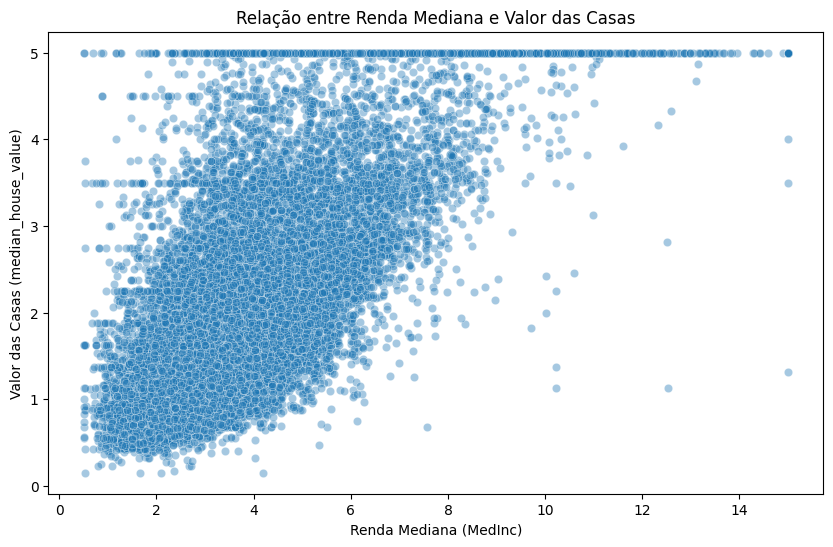

In [25]:
# Código do gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MedInc', y='median_house_value', data=data, alpha=0.4)
plt.title('Relação entre Renda Mediana e Valor das Casas')
plt.xlabel('Renda Mediana (MedInc)')
plt.ylabel('Valor das Casas (median_house_value)')
plt.show()


**Reflita:** o que você observa sobre a relação entre a renda mediana e o valor das casas? Existe uma correlação clara entre essas duas variáveis?

O gráfico revela uma tendência clara: regiões com renda mediana mais alta tendem a ter valores de casas mais elevados, indicando uma correlação positiva. No entanto, há dois pontos a serem observados:

- Truncamento: Valores acima de US$ 500.000 estão concentrados nesse limite, como se houvesse um "teto" nos dados. Isso distorce a relação real entre renda e valor, pois casas mais caras não são representadas adequadamente.

- Dispersão em rendas baixas: Mesmo em áreas com renda mediana similar, os valores das casas variam significativamente, sugerindo que outros fatores (como localização ou tamanho do imóvel) também influenciam o preço.

### Questão 2: Divisão dos Dados

In [26]:
from sklearn.model_selection import train_test_split

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Treino: {X_train.shape[0]} amostras | Teste: {X_test.shape[0]} amostras")


Treino: 14448 amostras | Teste: 6192 amostras


**Reflita:** por que é importante dividir os dados em conjuntos de treinamento e teste antes de treinar um modelo? O que você espera ao testar o modelo no conjunto de teste fazendo essa modificação no código?

A divisão é essencial para avaliar se o modelo generaliza bem para dados não vistos. Sem isso, poderíamos superestimar a performance (overfitting), já que o modelo poderia memorizar os dados de treino.

### Questão 3: Análise de Outliers


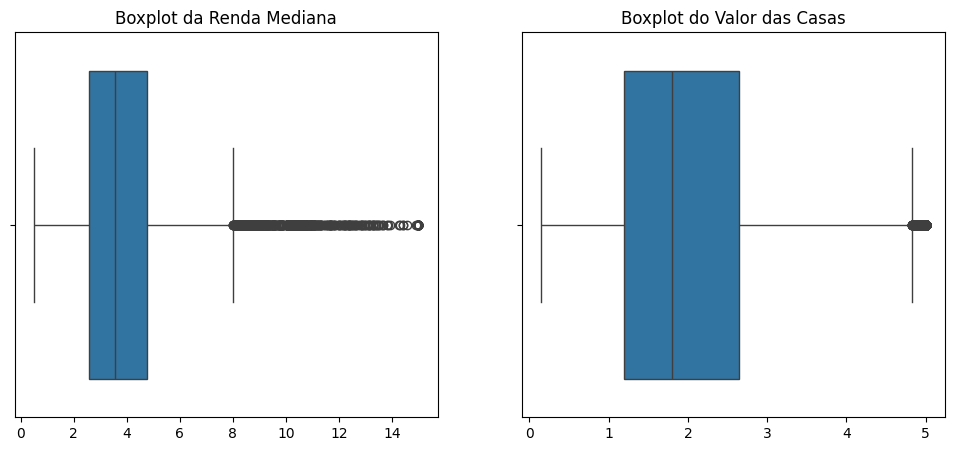

In [27]:
# Boxplot para MedInc
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=X[:, 0])
plt.title('Boxplot da Renda Mediana')

# Boxplot para House Value
plt.subplot(1, 2, 2)
sns.boxplot(x=y)
plt.title('Boxplot do Valor das Casas')
plt.show()


**Reflita:** existem valores atípicos (outliers) nessas variáveis? O que você poderia fazer para lidar com esses outliers? É necessário removê-los ou transformá-los para melhorar a precisão do modelo?

Os boxplots mostram dois tipos de outliers:
- Renda mediana: Algumas regiões têm rendas excepcionalmente altas (pontos acima do "bigode" do boxplot).
- Valor das casas: O truncamento em US$ 500.000 cria uma concentração artificial de outliers.

Para lidar com esses outliers:
- Para a renda: Uma transformação logarítmica reduziria o impacto de valores extremos sem perder dados.
- Para o valor das casas: Como o truncamento é intrínseco ao dataset (ex: limite de coleta de dados), removê-los não é recomendado, pois representam casos reais. Alternativamente, poderíamos tratar o problema como um modelo de censura, usando técnicas estatísticas específicas.

### Questão 4: Seleção de variáveis (feature Selection)


In [28]:
# Modelo com todas as variáveis
model_all = LinearRegression()
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)
mae_all = mean_absolute_error(y_test, y_pred_all)

# Modelo com variáveis selecionadas (MedInc, HouseAge, AveRooms)
X_selected = data[['MedInc', 'HouseAge', 'AveRooms']]
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.3, random_state=42)
model_sel = LinearRegression()
model_sel.fit(X_train_sel, y_train_sel)
y_pred_sel = model_sel.predict(X_test_sel)
mae_sel = mean_absolute_error(y_test_sel, y_pred_sel)

print(f'MAE com todas as variáveis: {mae_all:.2f}')
print(f'MAE com variáveis selecionadas: {mae_sel:.2f}')


MAE com todas as variáveis: 0.53
MAE com variáveis selecionadas: 0.60


**Reflita:**  o que aconteceu com o desempenho do modelo ao usar apenas uma seleção de variáveis? Foi melhor ou pior do que o modelo que usava todas as variáveis?

Os resultados mostram que o modelo com todas as variáveis (MAE = 0.53) teve um desempenho melhor que o modelo com variáveis selecionadas (MAE = 0.60). Isso acontece porque o modelo com todas as variáveis aproveitou informações mais completas. A seleção de variáveis requer equilíbrio: incluir preditores relevantes sem adicionar ruído, e sua eficácia depende do contexto e da qualidade das features escolhidas.
Colunas como Latitude e Longitude são fundamentais para capturar a localização geográfica, um fator crítico no mercado imobiliário.
Variáveis como AveOccup (média de ocupantes por casa) e Population (população total) podem refletir a densidade demográfica, que também influencia a demanda por moradia.

### Questão 5: Implementação de uma árvore de decisão para regressão

In [29]:
# Árvore de Decisão
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mae_tree = mean_absolute_error(y_test, y_pred_tree)

print(f'MAE Árvore de Decisão: {mae_tree:.2f}')
print(f'MAE Regressão Linear: {mae_all:.2f}')


MAE Árvore de Decisão: 0.47
MAE Regressão Linear: 0.53


**Reflita:**  qual dos modelos teve um desempenho melhor em termos de MAE? Por que a Árvore de Decisão pode ter apresentado melhor (ou pior) desempenho em comparação com a Regressão Linear? Considere como as Árvores de Decisão capturam relações não lineares nos dados.


A Árvore de Decisão (MAE = 0.47) superou a Regressão Linear (MAE = 0.53) porque consegue capturar relações não lineares (ex: interações entre renda e localização). Porém, árvores podem sofrer overfitting se não forem podadas(ajustadas). Já a regressão linear é mais interpretável, mas limitada a padrões lineares.
